In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

orders_url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
orderlines_url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
products_url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
brands_url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"

def import_csv(url):
  path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
  return pd.read_csv(path)

# Importing csvs and correcting data types
orderlines_qu = import_csv(orderlines_url)
orderlines_qu['date'] = pd.to_datetime(orderlines_qu['date'])
orders_qu = import_csv(orders_url)
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])
products_cl = import_csv(products_url)
brands_df = import_csv(brands_url)

# Incorporating additional information into orderlines data frame
orderlines_qu['short'] = orderlines_qu['sku'].str[:3]
orderlines_expanded = (
    orderlines_qu
    .merge(products_cl,
           on='sku')
    .merge(brands_df,
           on='short')
    .rename(columns={'long':'brand'})
    .drop(columns='short')
)
# Creating composite columns
orderlines_expanded['revenue'] = (
    orderlines_expanded['unit_price'] * orderlines_expanded['product_quantity']
)
orderlines_expanded['discount'] = (
    orderlines_expanded['price'] - orderlines_expanded['unit_price']
)
orderlines_expanded['total_discount'] = (
    orderlines_expanded['discount'] * orderlines_expanded['product_quantity']
)
orderlines_expanded['percentage_discount'] = (
    100 * orderlines_expanded['discount'] / orderlines_expanded['price']  #1-
)

In [3]:
orderlines_expanded_orders = orderlines_expanded.merge(orders_qu, left_on = 'id_order', right_on = 'order_id', how = 'inner').copy()

In [4]:
orderlines_expanded_orders_products = products_cl.merge(orderlines_expanded_orders, left_on ='sku', right_on = 'sku', how = 'inner').copy()

In [5]:
orderlines_expanded_orders_products['sku_abbr'] = ''
orderlines_expanded_orders_products['sku_abbr'] = orderlines_expanded_orders_products['sku'].str[:3]
pd.DataFrame(orderlines_expanded_orders_products)

,sku,name_x,desc_x,price_x,in_stock_x,type_x,id,id_order,product_id,product_quantity,...,brand,revenue,discount,total_discount,percentage_discount,order_id,created_date,total_paid,state,sku_abbr
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,...,Rain Design,54.99,5.00,5.00,8.334722,300551,2017-01-02 13:37:16,54.99,Completed,RAI
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,...,Rain Design,49.99,10.00,10.00,16.669445,310820,2017-01-17 09:39:32,49.99,Completed,RAI
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,...,Rain Design,49.99,10.00,10.00,16.669445,311042,2017-01-17 16:04:40,49.99,Completed,RAI
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,...,Rain Design,54.99,5.00,5.00,8.334722,324568,2017-02-15 13:43:09,59.98,Completed,RAI
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,...,Rain Design,54.99,5.00,5.00,8.334722,327565,2017-02-22 13:22:25,248.96,Completed,RAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,...,My MW,22.99,7.00,7.00,23.341114,464365,2017-12-16 14:47:48,27.98,Completed,MMW
53191,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,...,My MW,19.54,10.45,10.45,34.844948,475426,2017-12-28 20:41:08,24.53,Completed,MMW
53192,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,...,My MW,45.98,7.00,14.00,23.341114,490325,2018-01-13 23:19:50,135.96,Completed,MMW
53193,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,...,My MW,22.99,7.00,7.00,23.341114,496812,2018-02-07 12:32:13,104.97,Completed,MMW


In [6]:
orderlines_expanded_orders_products_brands = brands_df.merge(orderlines_expanded_orders_products, left_on ='short', right_on = 'sku_abbr', how = 'inner').copy()

In [7]:
based = orderlines_expanded_orders_products_brands.copy()

In [8]:
#dropping unnecessary columns
#based = based.drop('in_stock_x', axis = 1)

In [9]:
#attaching a category - column that shows 'D' if total_discount was applied to a given order
based['if_discount'] = ''
based.loc[based['total_discount']> 0,'if_discount'] = 'D'
pd.DataFrame(based)

,short,long,sku,name_x,desc_x,price_x,in_stock_x,type_x,id,id_order,...,revenue,discount,total_discount,percentage_discount,order_id,created_date,total_paid,state,sku_abbr,if_discount
0,8MO,8Mobility,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,Micro SD card adapter for MacBook Air 13-inch,35.00,0,12585395,1231276,347721,...,23.99,11.01,11.01,31.457143,347721,2017-04-20 10:22:00,23.99,Completed,8MO,D
1,8MO,8Mobility,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,Micro SD card adapter for MacBook Air 13-inch,35.00,0,12585395,1232346,347814,...,23.99,11.01,11.01,31.457143,347814,2017-04-21 11:39:21,53.98,Completed,8MO,D
2,8MO,8Mobility,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,Micro SD card adapter for MacBook Air 13-inch,35.00,0,12585395,1232464,348319,...,23.99,11.01,11.01,31.457143,348319,2017-04-21 12:39:48,23.99,Completed,8MO,D
3,8MO,8Mobility,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,Micro SD card adapter for MacBook Air 13-inch,35.00,0,12585395,1242009,352909,...,23.99,11.01,11.01,31.457143,352909,2017-05-05 10:06:37,68.98,Completed,8MO,D
4,8MO,8Mobility,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,Micro SD card adapter for MacBook Air 13-inch,35.00,0,12585395,1290653,376383,...,19.99,15.01,15.01,42.885714,376383,2017-07-12 14:33:12,162.96,Completed,8MO,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,ZAG,ZaggKeys,ZAG0038,Zagg Glass + X Clear Screen Protector iPhone,resistant protective impact and scratch temper...,29.99,1,13555403,1635040,521013,...,24.99,5.00,5.00,16.672224,521013,2018-03-04 20:23:01,71.98,Completed,ZAG,D
53191,ZAG,ZaggKeys,ZAG0040,Zagg Glass Screen Protector + Contour Contour ...,Protector impact and scratch resistant tempere...,39.99,1,13555403,1627724,517695,...,26.99,13.00,13.00,32.508127,517695,2018-02-26 14:32:17,65.47,Completed,ZAG,D
53192,ZAG,ZaggKeys,ZAG0041,Zagg iPhone Glass Screen Protector + 8 Plus / ...,impact and scratch resistant tempered glass fo...,29.99,1,13555403,1641150,523690,...,19.99,10.00,10.00,33.344448,523690,2018-03-09 10:45:50,44.97,Completed,ZAG,D
53193,ZAG,ZaggKeys,ZAG0042,Zagg Glass Screen Protector + iPhone 8/7 / 6 / 6S,Protector impact and scratch resistant tempere...,29.99,1,13555403,1641159,523690,...,19.99,10.00,10.00,33.344448,523690,2018-03-09 10:45:50,44.97,Completed,ZAG,D


FUNCTIONS

In [10]:
# creates a category cat_name if condition_word is in df["name"] for a given data frame df
def add_new_category_name(cat_name, condition_word,df):
  cat_name = "," + cat_name
  df.loc[df["name"].str.contains(condition_word, case=False), "category"] +=  cat_name
  #product_category_q.loc[product_category_q["desc"].str.contains(condition_word, case=False), "category"] +=  cat_name
  return pd.DataFrame(df)

def add_new_category_desc(cat_name, condition_word,df):
  cat_name = "," + cat_name
  #product_category_q.loc[product_category_q["name"].str.contains(condition_word, case=False), "category"] +=  cat_name
  df.loc[df["desc"].str.contains(condition_word, case=False), "category"] +=  cat_name
  return pd.DataFrame(df)

In [11]:
#creates a category cat_name if a word in condition_words is in df["desc"] for a given data frame df
def add_new_category_desc(cat_name, condition_words,df):
    cat_name = "," + cat_name
    tmp = "|".join(condition_words)
    df.loc[df["desc"].str.contains(tmp, case=False), "category"] +=  cat_name
    return pd.DataFrame(df)

In [12]:
from collections import Counter
#creates a list of (how_many) most commonly found words in a given (col_source) column for a given data frame df
def make_a_list(col_source, how_many,df):
  tmp = Counter(" ".join(df[col_source]).split())
  tmp_rev = {v: k for k, v in tmp.items()}
  sorted_dict_desc = {k: v for k, v in sorted(tmp_rev.items(), key=lambda item: item, reverse=True)}
  sorted_dict_desc_val_list = list(sorted_dict_desc.values())
  return sorted_dict_desc_val_list[:how_many]

In [13]:
#takes a brand abbreviation and df, and returns data only for that brand
def data_for_given_brand_only(brand_abbr,df):
  #set_name = str(brand_abbr) + 'brand'
  return df.loc[(df['short'] == brand_abbr)].copy()

In [14]:
# takes  elements from col_val that represents the noe largest elements in col_indx
def greatest_elements_data(col_val,col_indx,noe):
  # tmp = orderlines_expanded[colA].loc[orderlines_expanded[colB].isin(orderlines_expanded[colB].nlargest(noe))]
  tmp = based[col_val].loc[based[col_indx].isin(based[col_indx].sort_values(ascending = False).unique()[:10])]
  return  pd.DataFrame(tmp)

BASIC PLOTS FUNCTIONS

In [15]:
def three_lines_function(df):
  ol_for_plot = df.resample('W', on='date').agg({'product_quantity':'sum','id_order':'sum', 'percentage_discount':'mean','revenue':'mean'})
  fig = sns.relplot(height=4.5, aspect=2.5)
  sns.lineplot(
            data=ol_for_plot,
            x= 'date',
            y= 'id_order',
            c="red",
            ax=fig.ax)
  ax2 = fig.ax.twinx()
  sns.lineplot(
            data=ol_for_plot,
            x= 'date',
            y= 'percentage_discount',
            c="green",
            ax = ax2)
  ax3 = fig.ax.twinx()
  sns.lineplot(
            data=ol_for_plot,
            x= 'date',
            y= 'revenue',
            c="blue",
            ax = ax3)
  ax4 = fig.ax.twinx()
  sns.lineplot(
            data=ol_for_plot,
            x= 'date',
            y= 'product_quantity',
            c="yellow",
            ax = ax4)



In [16]:
def rev_disc_plot_bar(df):
  sns.catplot(kind="bar",
            data=df,
            x="percentage_discount",
            y="revenue",
            hue = 'if_ref',
            errorbar="sd",
            height=4,
            aspect=5);

In [17]:
def main_bar_plot(df):
  fig, axes = plt.subplots(4,1,sharex=True,figsize=(8,18))
  for ax, col in zip(axes, ['product_quantity','id_order','percentage_discount','revenue']):
    sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
  axes[-1].tick_params(axis='x', labelrotation=45)

SOME CATEGORIES

In [18]:
Refurbished =  ['Refurb','Renew','Reconditioned','Used','Second Hand','Like New','Unboxed','Open']


CLOSER LOOK AT APPLE PRODUCTS

In [19]:
based_winter = based.loc[based['date'].between('2017-09-01', '2017-12-31')]

In [20]:
based_winter_app = based_winter.loc[(based_winter['short'] == 'APP')]

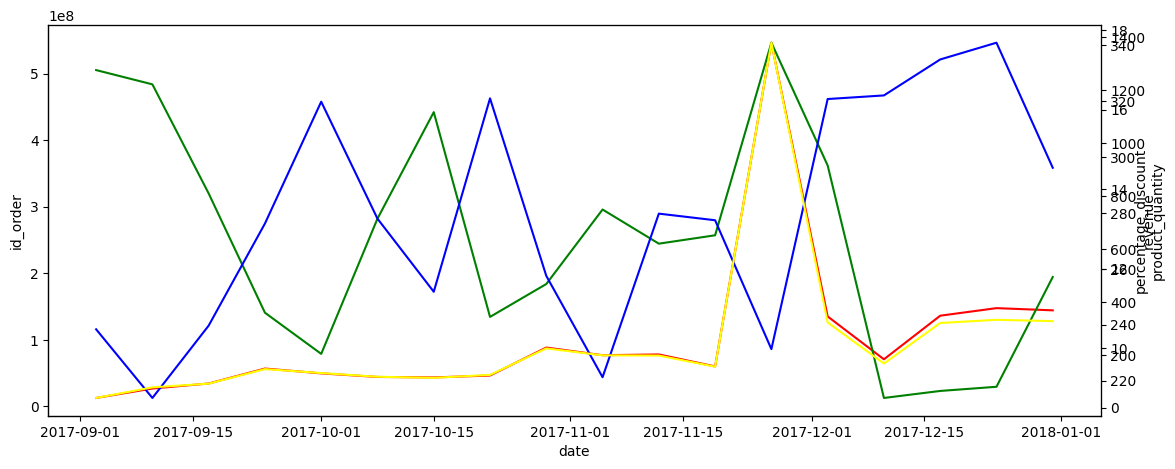

In [21]:
three_lines_function(based_winter_app)

In [22]:
based_winter_app_ref = based_winter_app.loc[based_winter_app['desc_x'].str.contains('Refurb|Renew|Reconditioned|Used|Second Hand|Like New|Unboxed|Open', case=False, na=False)]

In [23]:
based_winter_app_not_ref = based_winter_app.loc[~based_winter_app['desc_x'].str.contains('Refurb|Renew|Reconditioned|Used|Second Hand|Like New|Unboxed|Open', case=False, na=False)]

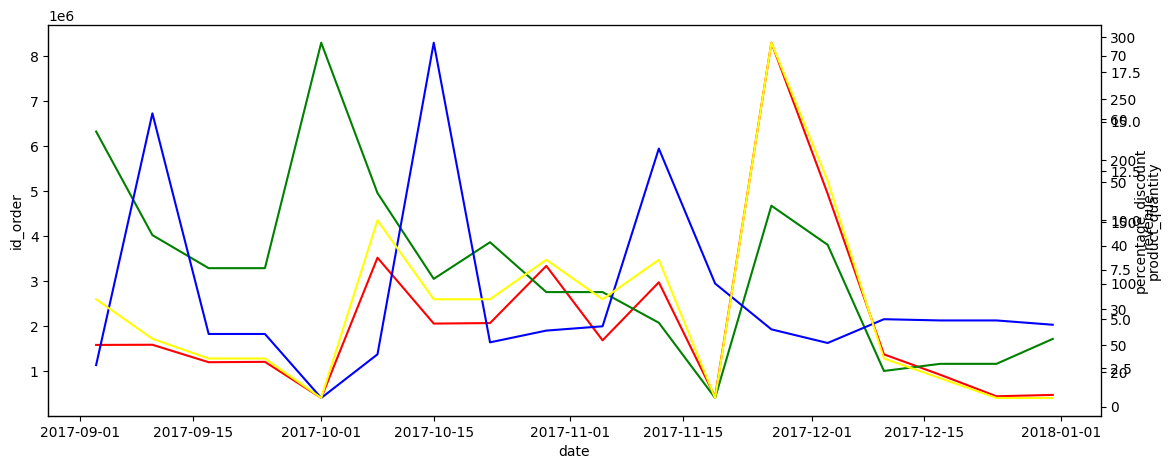

In [24]:
three_lines_function(based_winter_app_ref)

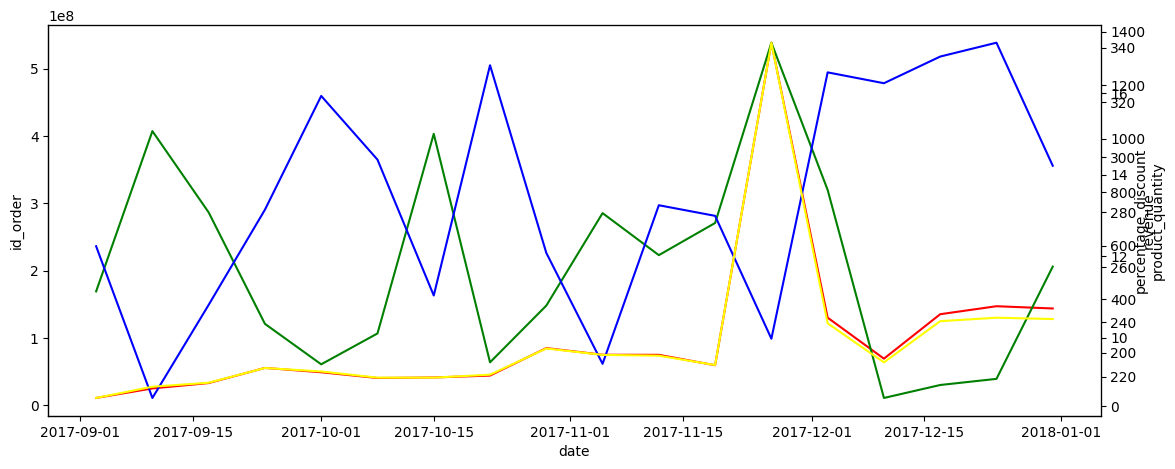

In [25]:
three_lines_function(based_winter_app_not_ref)

/tmp/ipython-input-1012905174.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors = ['red' if (x == example1['revenue'][12]) else 'grey' for x in example1['revenue']]
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` witho

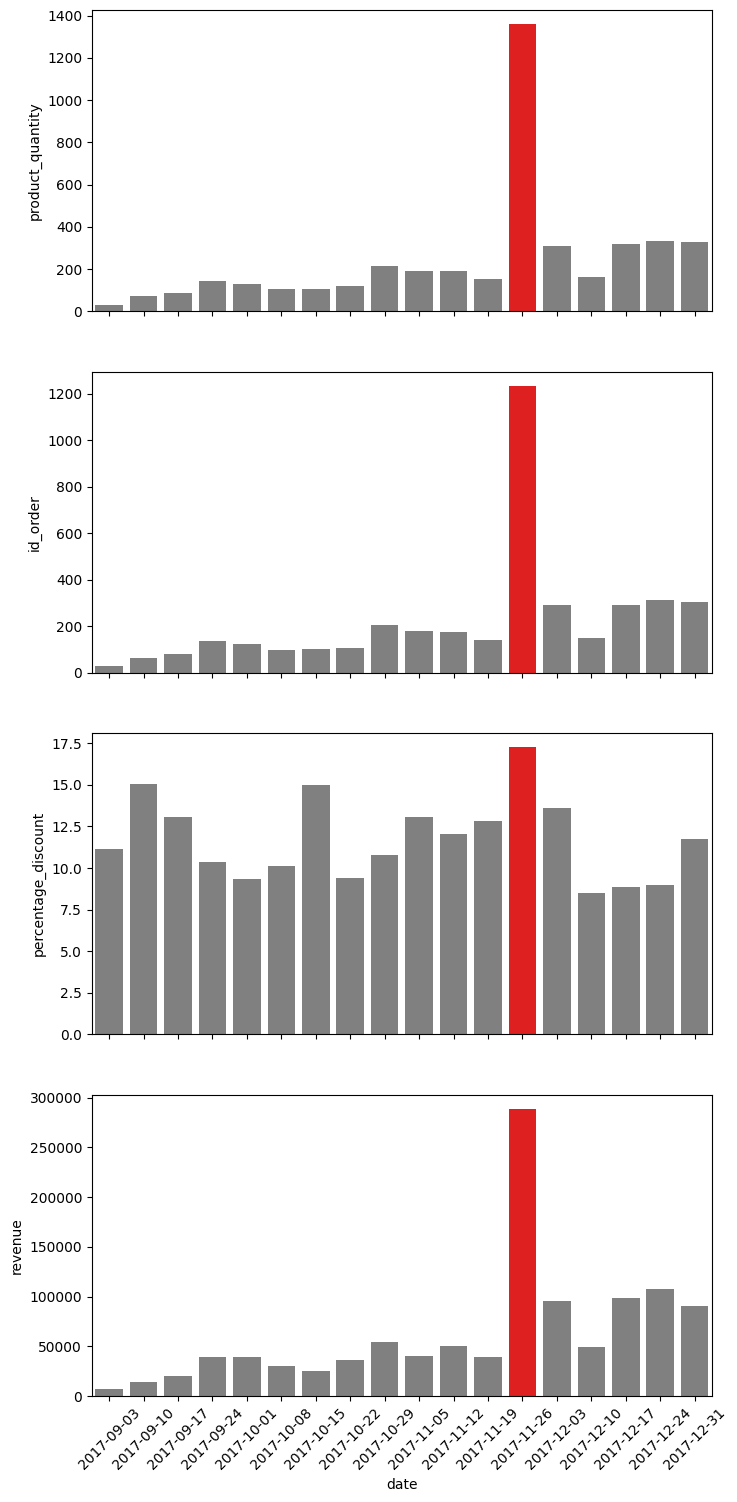

In [33]:
example1 = based_winter_app_not_ref.resample('W', on='date').agg({'product_quantity':'sum','id_order':'count', 'percentage_discount':'mean','revenue':'sum'})
colors = ['red' if (x == example1['revenue'][12]) else 'grey' for x in example1['revenue']]
main_bar_plot(example1)

/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

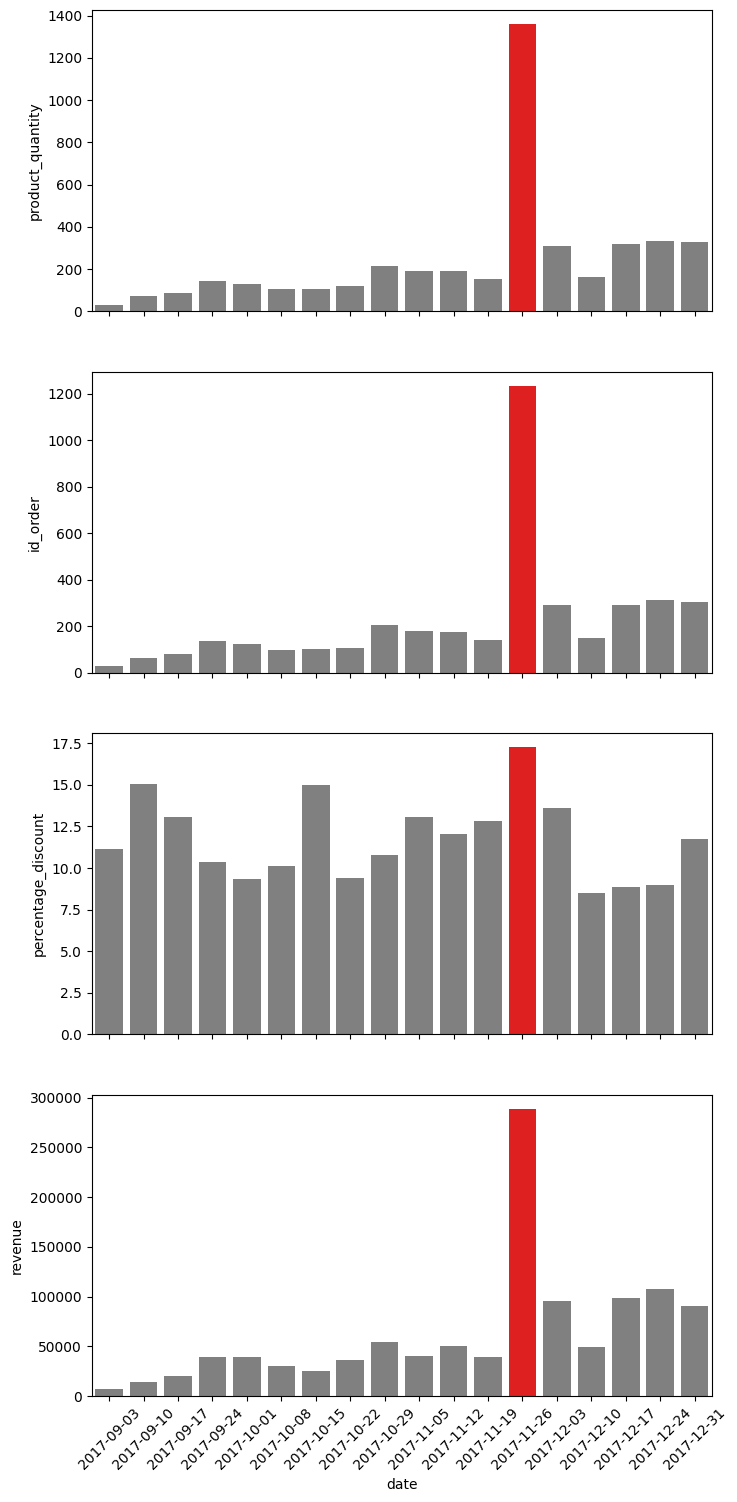

In [26]:
example1 = based_winter_app_not_ref.resample('W', on='date').agg({'product_quantity':'sum','id_order':'count', 'percentage_discount':'mean','revenue':'sum'})
colors = ['grey' if (x < max(example1['revenue'])) else 'red' for x in example1['revenue']]
main_bar_plot(example1)

/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

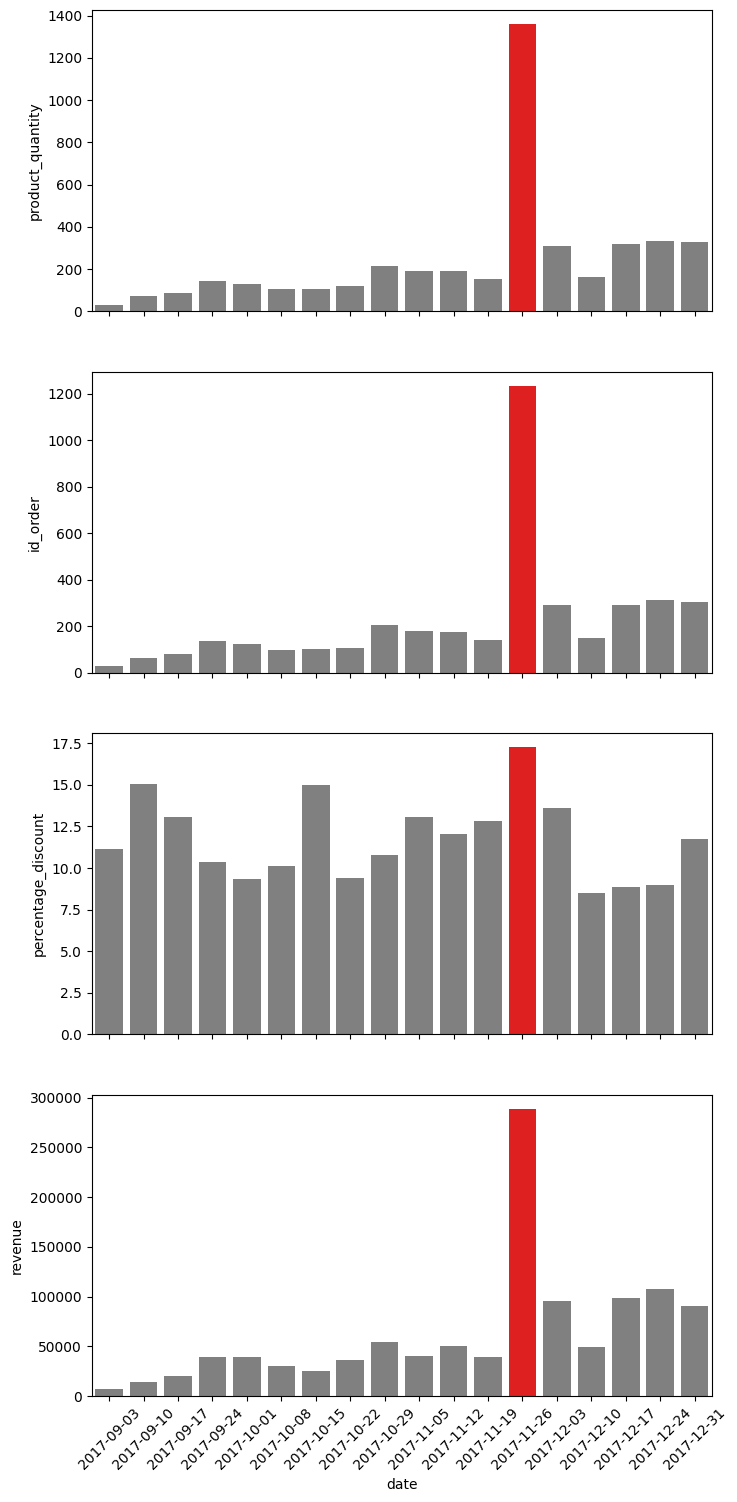

In [27]:
example2 = based_winter_app_not_ref.resample('W', on='date').agg({'product_quantity':'sum','id_order':'count', 'percentage_discount':'mean','revenue':'sum'})
colors = ['grey' if (x < max(example2['revenue'])) else 'red' for x in example2['revenue']]
main_bar_plot(example2)

/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=df, x='date',y=col, palette=colors)
/tmp/ipython-input-1043323918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

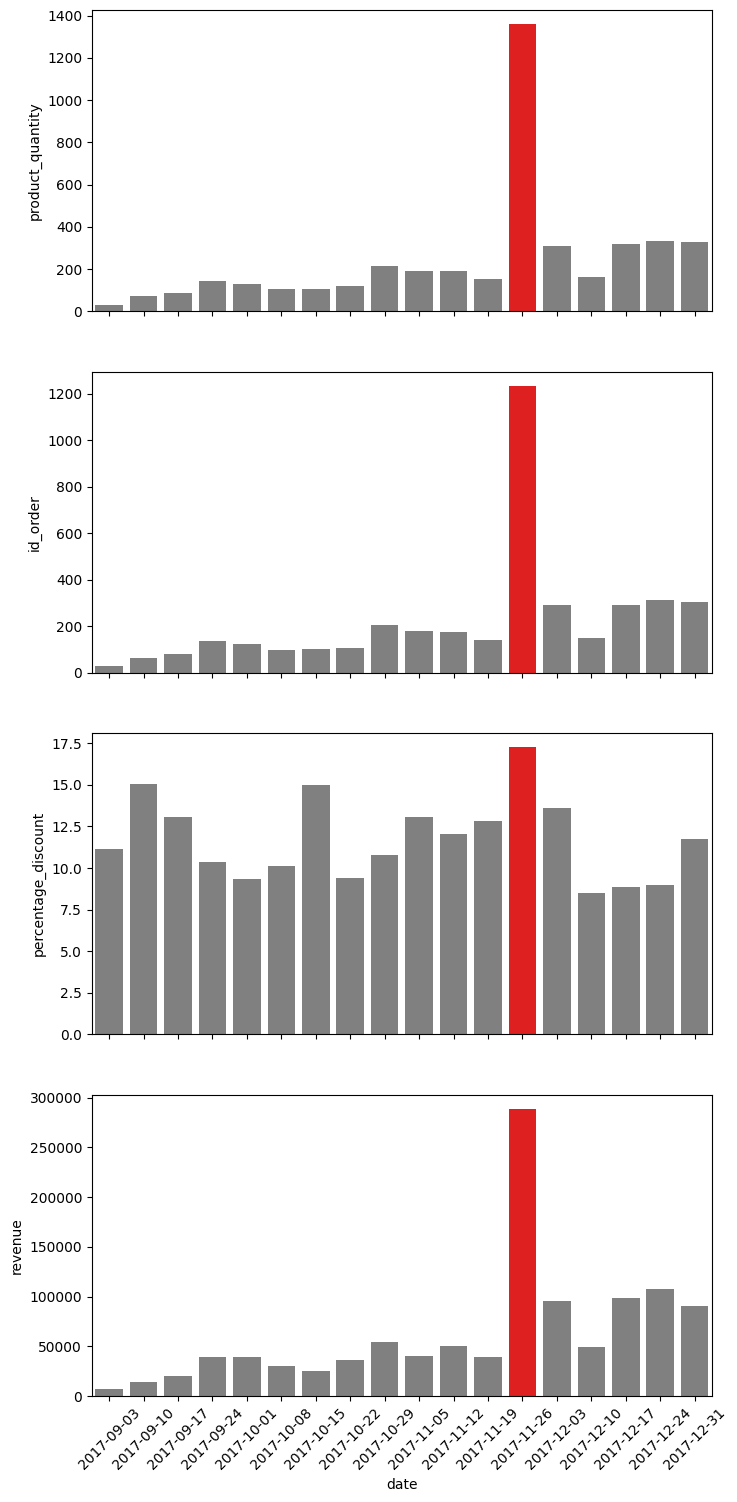

In [28]:
example3 = based_winter_app.resample('W', on='date').agg({'product_quantity':'sum','id_order':'count', 'percentage_discount':'mean','revenue':'sum'})

colors = ['grey' if (x < max(example3['revenue'])) else 'red' for x in example3['revenue']]

main_bar_plot(example1)

In [29]:
set_ref = set(make_a_list('name_x',100,based_winter_app_ref))

In [30]:
set_not_ref = set(make_a_list('name_x', 100,based_winter_app_not_ref))


In [31]:
set_ref - set_not_ref

{'"(OEM)', '-', '15', '17"', 'Compatible', 'Open', 'charger'}

In [32]:
set_not_ref - set_ref

{'"',
 '"Wi-Fi',
 '/',
 '1',
 '128GB',
 '1m',
 '2',
 '256GB',
 '3',
 '38mm',
 '4',
 '42mm',
 '6',
 '60W',
 '64GB',
 '6S',
 '6s',
 '7',
 '8',
 '8/7',
 'Adapter',
 'Aluminum',
 'Anthracite',
 'AppleCare',
 'Arena',
 'Belt',
 'Black',
 'Blue',
 'Bluetooth',
 'Brown',
 'Cable',
 'Candy',
 'Case',
 'Cellular',
 'Charcoal',
 'Connector',
 'Correa',
 'Cover',
 'Ethernet',
 'GPS',
 'Gold',
 'HDD',
 'Headset',
 'IPhone',
 'Leather',
 'Lightning',
 'Night',
 'Nike',
 'OEM',
 'Plan',
 'Platinum',
 'Plus',
 'Power',
 'Protection',
 'RAM',
 'Rose',
 'SE',
 'SSD',
 'Series',
 'Shining',
 'Silicon',
 'Silicone',
 'Silver',
 'Smart',
 'Space',
 'Spanish',
 'Sport',
 'Sports',
 'Strap',
 'Thunderbolt',
 'Touch',
 'USB',
 'USB-C',
 'Watch',
 'White',
 'Wi-Fi',
 'X',
 'adapter',
 'cable',
 'connector',
 'for',
 'iPhone',
 'iPod',
 'mini',
 'to',
 'with',
 '|'}